In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
####### Loading Data ######

ar_data = pd.read_csv('Dataset/IBM_AR.csv')

In [3]:
#making a copy data for working on algorithms

data = ar_data

In [4]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4


In [5]:
### Information about the Data

data.info()

##Insight##
# Out of 12 columns, we have around 7 columns of numeric type, 5 columns of string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   countryCode    2466 non-null   int64  
 1   customerID     2466 non-null   object 
 2   PaperlessDate  2466 non-null   object 
 3   invoiceNumber  2466 non-null   int64  
 4   InvoiceDate    2466 non-null   object 
 5   DueDate        2466 non-null   object 
 6   InvoiceAmount  2466 non-null   float64
 7   Disputed       2466 non-null   object 
 8   SettledDate    2466 non-null   object 
 9   PaperlessBill  2466 non-null   object 
 10  DaysToSettle   2466 non-null   int64  
 11  DaysLate       2466 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 231.3+ KB


In [6]:
##Checking Null Values

data.isnull().sum()

###Insight###

#No Null Values on the dataset

countryCode      0
customerID       0
PaperlessDate    0
invoiceNumber    0
InvoiceDate      0
DueDate          0
InvoiceAmount    0
Disputed         0
SettledDate      0
PaperlessBill    0
DaysToSettle     0
DaysLate         0
dtype: int64

In [7]:
# 5 Point summary of the data

data.describe()

,countryCode,invoiceNumber,InvoiceAmount,DaysToSettle,DaysLate
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


In [8]:
data.describe(include=np.object)

,customerID,PaperlessDate,InvoiceDate,DueDate,Disputed,SettledDate,PaperlessBill
count,2466,2466,2466,2466,2466,2466,2466
unique,100,91,681,681,2,695,2
top,9149-MATVB,3/3/2012,8/22/2013,1/29/2013,No,5/28/2013,Paper
freq,36,58,10,10,1905,10,1263


In [9]:
#Finding the duplitcate and creating a dataset for the duplicted files

duplicate = data[data.duplicated()]
duplicate

##Insight##
##There are no duplicates on the account.

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate


<AxesSubplot:xlabel='PaperlessBill', ylabel='count'>

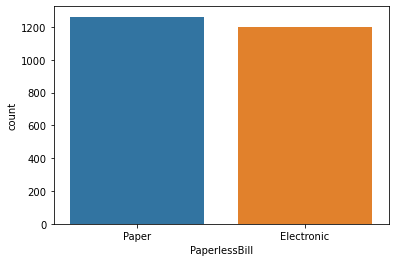

In [10]:
sns.countplot(data['PaperlessBill'])

##Insight
##Almost equal number of customers have opted for email bills and paper bills

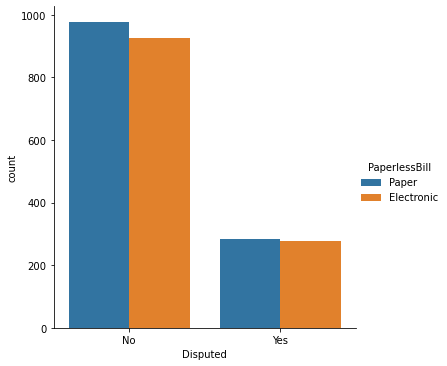

In [11]:
##CHecking if the disputes are related to the type of bills the customer has opted for 

sns.catplot(data = data, x= 'Disputed', hue = 'PaperlessBill', kind = 'count')

##Insight
#There are 300 customers who have diputed on their bills however the type of bills has not affected the disputes

In [12]:
#checking the count of late and non late customers

x=[]
y=[]
for i in data['DaysLate']:
    if i == 0:
        x.append(i)
    else:
        y.append(i)
        
        
print("The number of customers who made late payment is:",len(y))
print()
print("The number of customers who made timely payment is:",len(x))

The number of customers who made late payment is: 877

The number of customers who made timely payment is: 1589


<AxesSubplot:xlabel='DaysLate'>

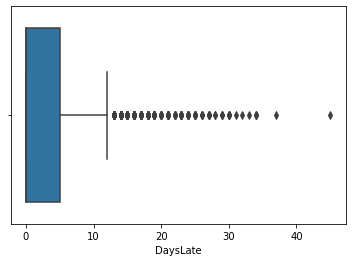

In [13]:
#Visualising the DaysLate Variable

sns.boxplot(data['DaysLate'])

###--Insight--###
##The average delay is with 10 Days. Howevere there are outliers who have exceeded that time period. The maximum delay is 45 days

<AxesSubplot:xlabel='countryCode', ylabel='DaysLate'>

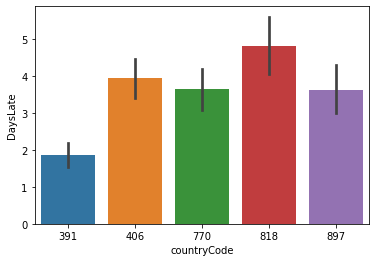

In [14]:
# Figuring which country code has the most late payment

sns.barplot(data=data, x= 'countryCode', y = 'DaysLate')

##Insight
#Country Code 818 has the highest number of customers who are prone to make delay on the payments which is usually 5 days and more
#It is closely followed by 406 & 897 which has around 4 days delay
# The most timely paid customers belong in the countrycode 391.

<AxesSubplot:xlabel='countryCode', ylabel='count'>

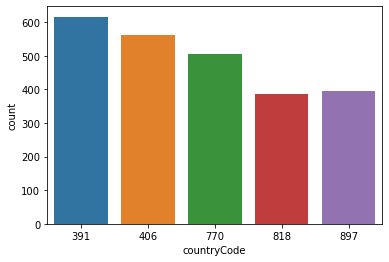

In [15]:
sns.countplot(data['countryCode'])

 Observations
1. We can levy charges on the country code 818 as we regularly face the delay on these customers from this code although they have a very low count of customers in resect to the others.
2. We can offer some discounts or offers to Country Code 391 as despite having the highest count of customers they are rone to timely payment. we might even be able to avoid the minimal delay on this code.


In [16]:
#Generating a new column for late prediction

data['Late'] = data['DaysLate'].apply(lambda x: 1 if x >0 else 0)

In [17]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1


In [18]:
#Generate a rolling count of the amount of late payments for each customer


data['countlate']=data.Late.eq(1).groupby(data.customerID).apply(
    lambda x : x.cumsum().shift().fillna(0)).astype(int)

In [19]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0


##### Creating another column for repeat customers on late payments

In [20]:
df1 = data[data['DaysLate']>0].copy()

In [21]:
df2 = pd.DataFrame(df1.groupby(['customerID'], axis=0, as_index=False)['DaysLate'].count())

In [22]:
df2.columns = (['customerID','repeatCust'])

In [23]:
df3 = pd.merge(data, df2, how='left', on='customerID')

In [24]:
df3['repeatCust'].fillna(0, inplace=True)

In [25]:
data = df3

In [26]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,0.0
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0


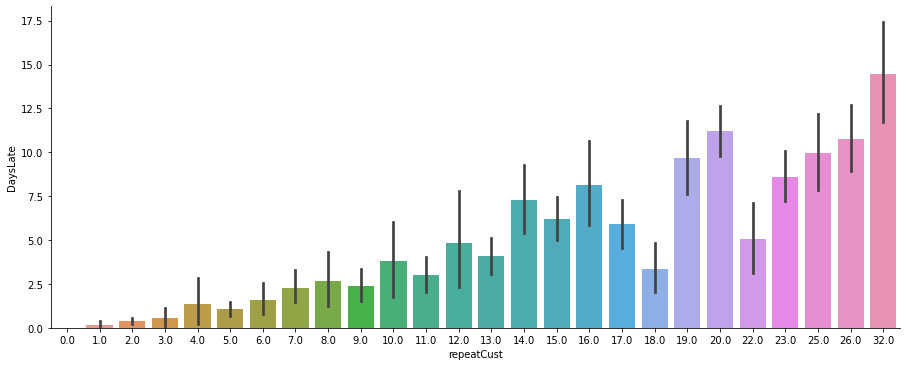

In [27]:
sns.catplot(x="repeatCust", y="DaysLate",data=data, aspect =2.5, kind = 'bar')

In [28]:
#Grouping the InvoiceAmount_bin column for less dimentionality

def func_IA (x):
    if x>60: return "b. more than 60"
    else: return "a. less than 60"
data['InvoiceAmount_bin'] = data['InvoiceAmount'].apply(func_IA)

In [29]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust,InvoiceAmount_bin
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,No,1/15/2013,Paper,13,0,0,0,1.0,a. less than 60
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,Yes,3/3/2013,Electronic,36,6,1,0,5.0,b. more than 60
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,No,7/8/2013,Electronic,5,0,0,0,0.0,b. more than 60
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,No,3/17/2013,Electronic,35,5,1,0,17.0,b. more than 60
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,Yes,11/28/2012,Paper,34,4,1,0,9.0,b. more than 60


<AxesSubplot:xlabel='InvoiceAmount_bin', ylabel='DaysLate'>

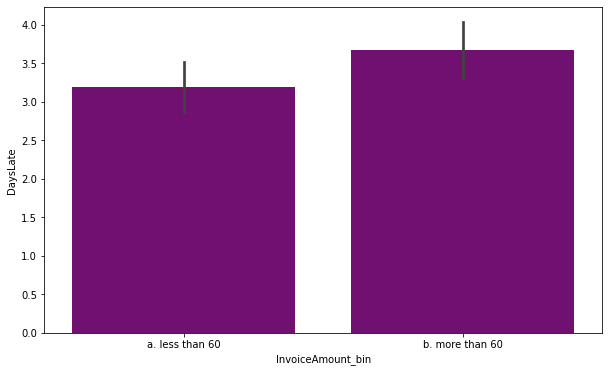

In [30]:
## COmparing the InvoiceAmount_bin data with the DaysLate Column

plt.figure(figsize=(10,6))
sns.barplot(x="InvoiceAmount_bin", y="DaysLate",data=data,color='purple')

###### Encoding the Categorical Columns

In [31]:
data['Disputed'] = data['Disputed'].map({'No':0,'Yes':1})
data['PaperlessBill'] = data['PaperlessBill'].map({'Paper': 0,'Electronic': 1})

In [32]:
# to understand on which quarters the invoices has fallen overdue

data['InvoiceQuarter']= pd.to_datetime(data['InvoiceDate']).dt.quarter

In [33]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust,InvoiceAmount_bin,InvoiceQuarter
0,391,0379-NEVHP,4/6/2013,611365,1/2/2013,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1.0,a. less than 60,1
1,406,8976-AMJEO,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,5.0,b. more than 60,1
2,391,2820-XGXSB,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,0.0,b. more than 60,3
3,406,9322-YCTQO,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,17.0,b. more than 60,1
4,818,6627-ELFBK,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,9.0,b. more than 60,4


<AxesSubplot:xlabel='InvoiceQuarter', ylabel='count'>

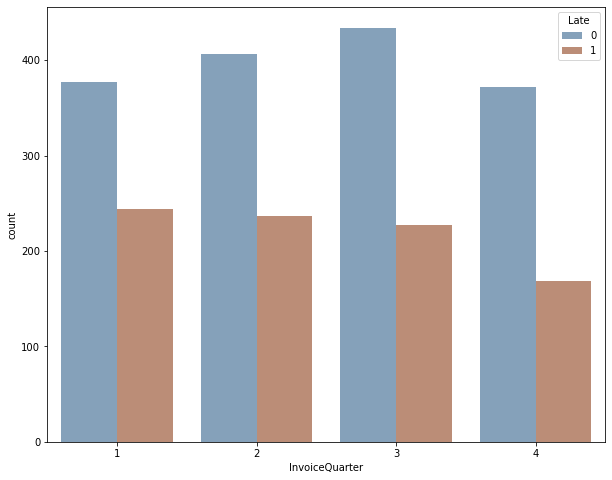

In [34]:
## Looking at per quarted late counts

plt.figure(figsize=(10,8))
sns.countplot(data['InvoiceQuarter'],hue=data['Late'],palette='twilight_shifted')

##--Insight--##
#Quarter 1 has the highest number of delay on payments.
#On quarter 3 the proportion of timely payments were high

## Model Creation

In [35]:
# labeling customers with integers for processing in models

labels = data['customerID'].astype('category').cat.categories.tolist()

In [36]:
replace_map_comp = {'customerID' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [37]:
#replace the customerID with Integers

data.replace(replace_map_comp, inplace=True)

In [38]:
data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust,InvoiceAmount_bin,InvoiceQuarter
0,391,2,4/6/2013,611365,1/2/2013,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1.0,a. less than 60,1
1,406,83,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,5.0,b. more than 60,1
2,391,21,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,0.0,b. more than 60,3
3,406,92,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,17.0,b. more than 60,1
4,818,55,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,9.0,b. more than 60,4


##### Correlation of the Dataset

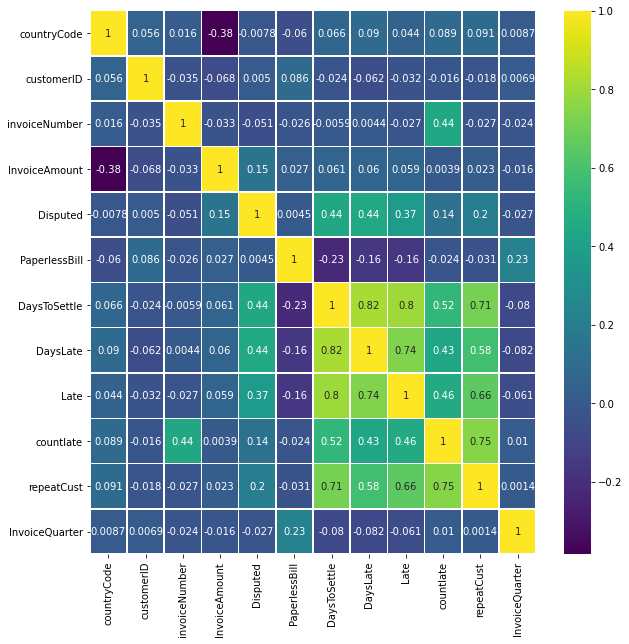

In [39]:
corremat = data.corr()
plt.figure(figsize=(10,10))
g= sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [40]:
corremat

,countryCode,customerID,invoiceNumber,InvoiceAmount,Disputed,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust,InvoiceQuarter
countryCode,1.000000,0.055996,0.015996,-0.384881,-0.007806,-0.059781,0.066341,0.090462,0.043793,0.089016,0.091388,0.008669
customerID,0.055996,1.000000,-0.035368,-0.068384,0.005046,0.086265,-0.024467,-0.062012,-0.032045,-0.016291,-0.017503,0.006893
invoiceNumber,0.015996,-0.035368,1.000000,-0.032699,-0.050752,-0.025532,-0.005921,0.004402,-0.027263,0.440836,-0.026865,-0.023844
InvoiceAmount,-0.384881,-0.068384,-0.032699,1.000000,0.148876,0.026988,0.060786,0.059980,0.059376,0.003896,0.022979,-0.015622
Disputed,-0.007806,0.005046,-0.050752,0.148876,1.000000,0.004499,0.439126,0.443232,0.370774,0.138634,0.198035,-0.026818
PaperlessBill,-0.059781,0.086265,-0.025532,0.026988,0.004499,1.000000,-0.225976,-0.163333,-0.164101,-0.023778,-0.030787,0.231733
DaysToSettle,0.066341,-0.024467,-0.005921,0.060786,0.439126,-0.225976,1.000000,0.820552,0.797269,0.524428,0.711414,-0.079688
DaysLate,0.090462,-0.062012,0.004402,0.059980,0.443232,-0.163333,0.820552,1.000000,0.736752,0.434659,0.583004,-0.081694
Late,0.043793,-0.032045,-0.027263,0.059376,0.370774,-0.164101,0.797269,0.736752,1.000000,0.458221,0.655188,-0.060579
countlate,0.089016,-0.016291,0.440836,0.003896,0.138634,-0.023778,0.524428,0.434659,0.458221,1.000000,0.745942,0.010264


In [41]:
corremat.columns

Index(['countryCode', 'customerID', 'invoiceNumber', 'InvoiceAmount',
       'Disputed', 'PaperlessBill', 'DaysToSettle', 'DaysLate', 'Late',
       'countlate', 'repeatCust', 'InvoiceQuarter'],
      dtype='object')

##### Encoding the dataset

In [42]:
cat_feats = ['InvoiceAmount_bin']
final_data = pd.get_dummies(data,columns=cat_feats,drop_first=True)

In [43]:
final_data.head()

,countryCode,customerID,PaperlessDate,invoiceNumber,InvoiceDate,DueDate,InvoiceAmount,Disputed,SettledDate,PaperlessBill,DaysToSettle,DaysLate,Late,countlate,repeatCust,InvoiceQuarter,InvoiceAmount_bin_b. more than 60
0,391,2,4/6/2013,611365,1/2/2013,2/1/2013,55.94,0,1/15/2013,0,13,0,0,0,1.0,1,0
1,406,83,3/3/2012,7900770,1/26/2013,2/25/2013,61.74,1,3/3/2013,1,36,6,1,0,5.0,1,1
2,391,21,1/26/2012,9231909,7/3/2013,8/2/2013,65.88,0,7/8/2013,1,5,0,0,0,0.0,3,1
3,406,92,4/6/2012,9888306,2/10/2013,3/12/2013,105.92,0,3/17/2013,1,35,5,1,0,17.0,1,1
4,818,55,11/26/2012,15752855,10/25/2012,11/24/2012,72.27,1,11/28/2012,0,34,4,1,0,9.0,4,1


In [44]:
## Selecting the features which will affects the late payment

features=['countryCode', 'customerID', 'InvoiceAmount',
       'Disputed', 'PaperlessBill','repeatCust','Late', 'DaysToSettle',
       'countlate']

In [45]:
features

['countryCode',
 'customerID',
 'InvoiceAmount',
 'Disputed',
 'PaperlessBill',
 'repeatCust',
 'Late',
 'DaysToSettle',
 'countlate']

## Splitting the dataset on how many days late might we expect the payment

In [46]:
X = final_data[features]
Y = final_data['DaysLate']

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

## Gradient Boosting Classifier Algorithmm

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gradient_booster = GradientBoostingClassifier(learning_rate = 0.1)

In [50]:
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:
gradient_booster.fit(X_train,Y_train)

GradientBoostingClassifier()

In [52]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         6
          17       1.00    

## Splitting the dataset on given the inputs if the customer will be late for the payments or not

In [145]:
## Selecting the features which will affects the late payment

features1=['countryCode', 'customerID', 'InvoiceAmount',
       'Disputed', 'PaperlessBill','repeatCust',
       'countlate']

In [146]:
features1

['countryCode',
 'customerID',
 'InvoiceAmount',
 'Disputed',
 'PaperlessBill',
 'repeatCust',
 'countlate']

In [147]:
A = final_data[features1]
B = final_data['Late']

In [148]:
from sklearn.model_selection import train_test_split

A_train,A_test,B_train,B_test = train_test_split(A,B,random_state=0, test_size=0.3)

### Gradient Boosting Classifier Algorithm

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [150]:
#Tuning the Gradient Boost

learning_rates = [0.05, 0.1, 0.25, 0.75, 1]

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators = 20, learning_rate = learning_rate, max_features = 2, max_depth = 2, random_state = 0)
    gb.fit(A_train,B_train)
    print("Learning Rate :", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(A_train,B_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb.score(A_test,B_test)))
    print()

Learning Rate : 0.05
Accuracy score (training): 0.808
Accuracy score (testing): 0.811

Learning Rate : 0.1
Accuracy score (training): 0.834
Accuracy score (testing): 0.841

Learning Rate : 0.25
Accuracy score (training): 0.856
Accuracy score (testing): 0.866

Learning Rate : 0.75
Accuracy score (training): 0.867
Accuracy score (testing): 0.873

Learning Rate : 1
Accuracy score (training): 0.866
Accuracy score (testing): 0.874



In [161]:
gradient_booster = GradientBoostingClassifier(learning_rate = 1)

In [162]:
gradient_booster.fit(A_train,B_train)

GradientBoostingClassifier(learning_rate=1)

In [163]:
from sklearn.metrics import classification_report

print(classification_report(B_test, gradient_booster.predict(A_test)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       476
           1       0.80      0.80      0.80       264

    accuracy                           0.86       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.86      0.86      0.86       740



### Logistic Regression Algorithm

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [155]:
logreg = LogisticRegression()
logreg.fit(A_train, B_train)

LogisticRegression()

In [156]:
B_pred = logreg.predict(A_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(A_test, B_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(B_test, B_pred)

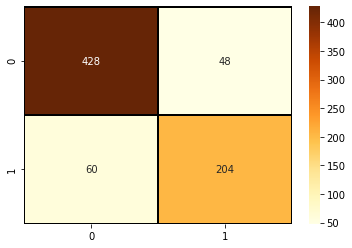

In [158]:
sns.heatmap(data = confusion_matrix, annot = True,fmt = 'd', linewidths=1.5, cmap="YlOrBr", linecolor='black',)
plt.show()

In [159]:
from sklearn.metrics import classification_report
print(classification_report(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       476
           1       0.81      0.77      0.79       264

    accuracy                           0.85       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.85      0.85      0.85       740



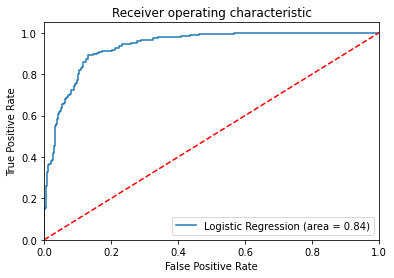

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(B_test, logreg.predict(A_test))
fpr, tpr, thresholds = roc_curve(B_test, logreg.predict_proba(A_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()